# Carga y limpieza de datos y calculo de variables Return y Risk

Primera fase de carga de datos de fondos de inversión, revisión y limpieza de datos, cálculo de ratios básicos de Rentabilidad/Return y Riesgo/Risk 


In [7]:
# Cargamos librerías
import pandas as pd
import numpy as np
import investpy
#Liberías para gráficos plot()
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt

##############
### LIBRERIAS PROPIAS PERSONALIZADAS
##############
import f_graficas as graf

# Carga de Fondos de Inversion

A continuación, cargamos los datos básicos de fondos de inversión y los almacenamos en ficheros

In [3]:
# FONDOS DE INVERSION EN ESPAÑA

# Retrieve all available funds information as a pandas.DataFrame
funds_df = investpy.get_funds(country="Spain")
# Retrieve a listing of all the available fund names
funds_list = investpy.get_funds_list(country="Spain")
# Retrieve a dictionary with all the funds and all of their information fields
funds_dict = investpy.get_funds_dict(country="Spain")

In [4]:
funds_df.head()

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,spain,Ubs Mixto Gestión Activa I Fi,158316036,UBS Gestión SGIIC,ES0158316036,equity,EUR,None
1,spain,Abante Valor Fi,190052037,Abante Asesores Gestión SGIIC,ES0190052037,equity,EUR,None
2,spain,Bankinter Multiselección Conservador Fi,180959035,Bankinter Gestión de Activos SGIIC,ES0180959035,equity,EUR,None
3,spain,Ing Direct Fondo Naranja Conservador Fi,152747004,Amundi Iberia SGIIC,ES0152747004,equity,EUR,None
4,spain,Ubs Mixto Gestión Activa P Fi,158316002,UBS Gestión SGIIC,ES0158316002,equity,EUR,None


In [13]:
# numero de fondos de inversion españoles
funds_df.shape[0]

4107

In [14]:
# numero de fondos de inversión totales de investpy
investpy.get_funds().shape[0]

82221

In [17]:
import datetime
import numpy as np
import pandas as pd
df = pd.DataFrame()
from_date='01/01/2000'
to_date='24/01/2021'
fondo='Rural Mixto Internacional 25 Fi'
df_hist1 = investpy.get_fund_historical_data(fund=fondo, country='spain', from_date=from_date, to_date=to_date)
date = [datetime.datetime(2018, 1, 1) + datetime.timedelta(days=x) for x in range(0, 365)]
value = list(np.random.randint(low=0, high=100, size=365))
df['date'] = pd.to_datetime(date)
df.index = df['date']
df['value'] = value

In [221]:
df_hist1.head(10)

,Open,High,Low,Close,Currency
Date,,,,,
2000-01-01,696.84,696.84,696.84,696.84,EUR
2000-01-02,696.87,696.87,696.87,696.87,EUR
2000-01-03,696.17,696.17,696.17,696.17,EUR
2000-01-04,693.46,693.46,693.46,693.46,EUR
2000-01-05,692.14,692.14,692.14,692.14,EUR
2000-01-06,692.16,692.16,692.16,692.16,EUR
2000-01-07,689.04,689.04,689.04,689.04,EUR
2000-01-08,689.07,689.07,689.07,689.07,EUR
2000-01-09,689.09,689.09,689.09,689.09,EUR


## Calculamos el Return/Rentabilidad

La fórmula para calcular la rentabilidad en un periodo de tiempo es 

desde la fecha $t$ a la fecha ${t+1} sería:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

o bien,

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

Utilizaremos el precio de Cierre del día para calcular la Rentabilidad/Return de los Fondos de Inversión

Nota Importante.- en estos datos de entrada no disponemos de el precio de Cierre del día ajustado que en los fondos de inversión se hace tras aplicar dividendos, etc, si dispusieramos de dicha información habría que utlizar el precio de Cierre ajustado (normalmente se calcula y publica a las 23:00 del mismo día)


In [158]:
# Calculo de Rentabildad de forma manual para entender la formula, 
# con la funcion pct_change() de Pandas se obtienen los mismos resultados

ret_hist1=(df_hist1.Close.iloc[1:].values/df_hist1.Close.iloc[:-1].values)-1
ret_df_hist1 = pd.DataFrame(ret_hist1[1:10])
ret_df_hist1.columns={"Returns"}
ret_df_hist1.head()

,Returns
0,0.000669
1,0.001655
2,0.001007
3,-0.000579
4,0.000044


In [159]:
# Utilizaremos la funcion pct_change() para calcular la rentabilidad por cada 
# periodo que se defina: en principio puede tener sentido semanal, mensual, trimestral,
# anual, cada 3, 5 y 10 años. dependiendo lo que nos interese analizar
df_hist1.Close.pct_change().head()

Date
2020-01-02         NaN
2020-01-03   -0.000241
2020-01-07    0.000669
2020-01-08    0.001655
2020-01-09    0.001007
Name: Close, dtype: float64


Para obtener la rentabilidad/Return utilizaremos la funcion pct_change() 
en combinación con resample() de cara a obtener la rentabilidad agrupada por el periodo que nos interese.


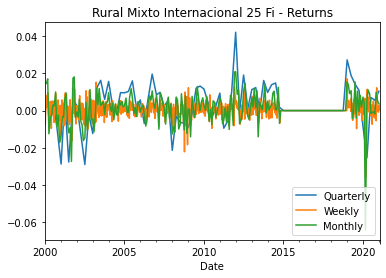

In [222]:
# Agrupación por "Q"uarter, "W"eek, "M"onth, "B"usiness day, "D"aily, "Y"early
# la función resample() fuciona con datos de tipo fecha en el índice del dataframe
# sino habría que utilizar la función groupby()

agrupQ=df_hist1.Close.resample('Q').mean().pct_change()
agrupW=df_hist1.Close.resample('W').mean().pct_change()
agrupM=df_hist1.Close.resample('M').mean().pct_change()
agrupQ.plot()
agrupW.plot()
agrupM.plot()
legend((['Quarterly','Weekly','Monthly']),
prop = {'size': 10}, loc='lower right')
title('Rural Mixto Internacional 25 Fi - Returns')
plt.show()

In [160]:
# Otra forma de hacer la agrupacion sería con groupby(), serviría para indices
# del dataframe que no necesariamente tengan formato fecha (datetime)
df.groupby(df['date'].dt.week).mean().pct_change().head()

,value
date,
1,NaN
2,0.092313
3,-0.089974
4,-0.225989
5,0.233577


In [30]:
df.groupby(df['date'].dt.quarter).mean()

,value
date,
1,49.388889
2,55.747253
3,50.250000
4,49.706522


In [31]:
df.groupby(df['date'].dt.year).mean()

,value
date,
2018,51.271233


In [39]:
import matplotlib.pyplot as plt
df.groupby(df['date'].dt.month).mean().pct_change()

,value
date,
1,NaN
2,0.220755
3,-0.214684
4,0.189224
5,0.168902
6,-0.179742
7,-0.007056
8,0.057107
9,-0.143437


## Calculando el Riesgo/Volatilidad con la función std()

para calcular la volatilidad utilizaremos la función std()

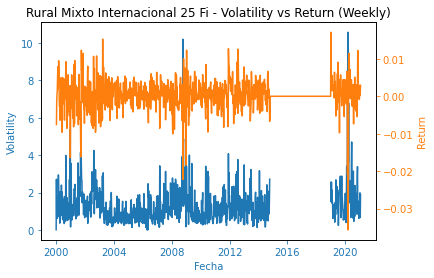

0

In [18]:
#agrupacion por Quarter, Week, Month, Business day, Daily

#plt.figure(figsize=(12, 5))


graf.grafico_volat_renta(df_hist1,fondo)



### Anáisis de datos
 
Analizando el gráfico de la evolucion de la Volatilidad y la Rentabilidad semanal vemos que: 
> hay una volatilidad muy alta (llegando a un incremento de volatilidad semana a semana del 10%) tanto en la crisis de 2008 como en Covid-19 2020. Este dato es importante para la funcionalidad de monitorización para avisar a los clientes cuando tienen que tomar medidas.
> En ambos casos se ve una sacudida de una o varias semanas 3 ó 4 en el mercado y vuelve a los valores anteriores en el caso del fondo "Rural Mixto Internacional 25 Fi"
> Analizando otro fondo


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


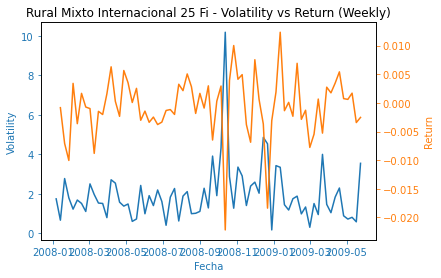

0

In [16]:
# Analizando el periodo de la crisis del 2008
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from_date='01/01/2008'
to_date='24/05/2009'
fondo='Rural Mixto Internacional 25 Fi'
df_hist1 = investpy.get_fund_historical_data(fund=fondo, country='spain', from_date=from_date, to_date=to_date)
graf.grafico_volat_renta(df_hist1,fondo)

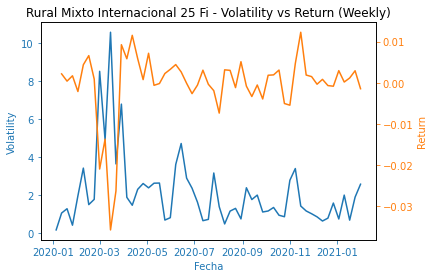

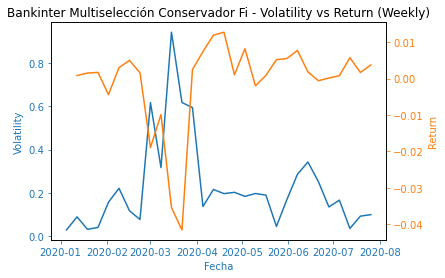

0

In [15]:
# Analizando el periodo del Covid-19 en 2020
from_date='01/01/2020'
to_date='31/01/2021'
fondo='Rural Mixto Internacional 25 Fi'
df_hist1 = investpy.get_fund_historical_data(fund=fondo, country='spain', from_date=from_date, to_date=to_date)
graf.grafico_volat_renta(df_hist1,fondo)

fondo='Bankinter Multiselección Conservador Fi'
df_hist1_2 = investpy.get_fund_historical_data(fund=fondo, country='spain', from_date=from_date, to_date=to_date)
graf.grafico_volat_renta(df_hist1_2,fondo)

## Calidad de Datos

identificados gaps en los datos 
> p.e. en el FI: "Rural Mixto Internacional 25 Fi" faltan datos 
> 'Bankinter Multiselección Conservador Fi' faltan datos desde Agosto 2020

In [68]:
#REntabilidad anual
df_hist1.Close.resample('Y').mean().pct_change()

Date
2017-12-31         NaN
2018-12-31   -0.005553
2019-12-31    0.002765
2020-12-31   -0.003187
2021-12-31    0.011602
Freq: A-DEC, Name: Close, dtype: float64

In [73]:
#REntabilidad anual
df_hist1.Close.resample('Y').std()

Date
2017-12-31     5.113829
2018-12-31    10.033679
2019-12-31    15.613105
2020-12-31    18.196767
2021-12-31     2.150356
Freq: A-DEC, Name: Close, dtype: float64

In [79]:
sharpe=(df_hist1.Close.resample('Y').mean().pct_change()-0.05)/(df_hist1.Close.resample('Y').std())

In [80]:
sharpe


Date
2017-12-31         NaN
2018-12-31   -0.005537
2019-12-31   -0.003025
2020-12-31   -0.002923
2021-12-31   -0.017856
Freq: A-DEC, Name: Close, dtype: float64

In [141]:
import pandas as pd
df=pd.DataFrame([])
funds_list = investpy.get_funds_list(country="Spain")
j=0
for i in funds_list:
    j=j+1
    temp=investpy.get_fund_historical_data(fund=i, country='spain', from_date='01/01/2017', to_date='24/01/2021')
    df[j] = (temp.Close.resample('W').mean().pct_change())/(temp.Close.resample('W').std())
    if j==100: 
        break
    else:
        print(j,"-",i," sharpe anual ",(temp.Close.resample('Y').mean().pct_change())/(temp.Close.resample('Y').std()))


1 - Ubs Mixto Gestión Activa I Fi  sharpe anual  Date
2017-12-31         NaN
2018-12-31   -0.002450
2019-12-31    0.034400
2020-12-31    0.013928
2021-12-31    0.952665
Freq: A-DEC, Name: Close, dtype: float64
2 - Abante Valor Fi  sharpe anual  Date
2017-12-31         NaN
2018-12-31   -0.018228
2019-12-31   -0.002634
2020-12-31   -0.018757
2021-12-31    1.067511
Freq: A-DEC, Name: Close, dtype: float64
3 - Bankinter Multiselección Conservador Fi  sharpe anual  Date
2017-12-31         NaN
2018-12-31   -0.006273
2019-12-31   -0.009983
2020-12-31   -0.008263
Freq: A-DEC, Name: Close, dtype: float64
4 - Ing Direct Fondo Naranja Conservador Fi  sharpe anual  Date
2017-12-31         NaN
2018-12-31   -0.094806
2019-12-31    0.072511
2020-12-31    0.029660
2021-12-31    3.440154
Freq: A-DEC, Name: Close, dtype: float64
5 - Ubs Mixto Gestión Activa P Fi  sharpe anual  Date
2017-12-31         NaN
2018-12-31   -0.011591
2019-12-31    0.032843
2020-12-31    0.012295
2021-12-31    0.997509
Freq: A-

KeyboardInterrupt: 

In [130]:
df.dropna()
df[1].head (20)

Date
2021-01-10         NaN
2021-01-17   -1.771582
2021-01-24   -0.847713
Freq: W-SUN, Name: 1, dtype: float64

In [139]:
df[df[1]>0.001]

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-15,0.041458,-0.067046,-0.002759,NaN,0.030650,-0.170979,-0.211478,0.000982,0.300382,NaN,...,NaN,NaN,NaN,-0.001947,0.044558,0.204765,0.008363,0.008775,0.048490,NaN
2017-01-29,0.004631,0.045990,0.012109,-inf,-0.002054,-0.022116,-0.241211,0.000225,0.026097,7.295672e-02,...,NaN,NaN,NaN,0.004135,-0.002820,0.061027,-0.009062,-0.009447,0.053435,NaN
2017-02-12,0.067175,0.138731,0.015508,inf,0.072451,0.098058,0.218691,0.001715,0.352050,2.735604e-01,...,NaN,NaN,NaN,0.014625,0.041321,0.102833,-0.003596,-0.002981,0.172088,NaN
2017-02-19,0.307938,0.625363,0.129468,0.065994,0.346965,0.500079,2.345164,0.011860,1.132151,6.009324e-01,...,NaN,NaN,NaN,0.035700,0.017341,0.855626,0.037837,0.039739,0.299796,NaN
2017-02-26,0.079150,0.110322,0.014122,0.174141,0.076173,0.342146,0.578548,0.003083,0.326380,4.001315e-01,...,NaN,NaN,NaN,0.006954,-0.009748,0.248342,-0.014134,-0.015447,0.255968,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.009636,-0.044504,NaN,-0.045672,0.011346,-0.094287,0.055146,-0.000535,0.033808,4.965068e-14,...,0.047442,0.286894,-0.448166,0.011903,0.012250,0.440460,0.007014,0.007921,0.009539,-0.243180
2021-01-03,0.142994,0.458658,NaN,0.318155,0.132564,0.321285,0.128781,0.004016,0.444285,4.336124e-01,...,-0.589172,0.060697,1.681059,0.012523,0.081901,0.210624,0.224178,0.252977,0.137665,0.529084
2021-01-10,0.032488,0.032649,NaN,0.149008,0.034892,0.047413,0.111705,0.000089,0.207912,3.375676e-01,...,-0.036728,0.174829,2.239238,0.005563,0.004138,0.115543,0.013134,0.014429,0.078780,0.748532
